<a href="https://colab.research.google.com/github/wahyuardhik/pemrograman-python/blob/main/Tugas%202%20Image%20Classification%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
ls

3scene/   nnmodel_scene/   Untitled1.ipynb
dataset/  Untitled0.ipynb  Untitled2.ipynb


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [6]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [7]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 
  # preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [9]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [11]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [44]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
# fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               627300    
_________________________________________________________________
dense_19 (Dense)             (None, 5)               

In [45]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 104ms/step - loss: 1.6123 - accuracy: 0.2763 - val_loss: 1.5351 - val_accuracy: 0.2877
Epoch 2/25
14/14 [==============================] - 1s 94ms/step - loss: 1.4295 - accuracy: 0.4247 - val_loss: 1.3096 - val_accuracy: 0.5411
Epoch 3/25
14/14 [==============================] - 1s 95ms/step - loss: 1.1756 - accuracy: 0.5388 - val_loss: 1.1298 - val_accuracy: 0.5137
Epoch 4/25
14/14 [==============================] - 1s 95ms/step - loss: 1.0634 - accuracy: 0.5297 - val_loss: 1.0165 - val_accuracy: 0.6164
Epoch 5/25
14/14 [==============================] - 1s 95ms/step - loss: 0.9325 - accuracy: 0.6119 - val_loss: 1.0260 - val_accuracy: 0.5890
Epoch 6/25
14/14 [==============================] - 1s 97ms/step - loss: 0.8149 - accuracy: 0.6918 - val_loss: 0.8951 - val_accuracy: 0.6096
Epoch 7/25
14/14 [==============================] - 1s 97ms/step - loss: 0.7370 - accuracy: 0.7237 - val_loss: 0.7841 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


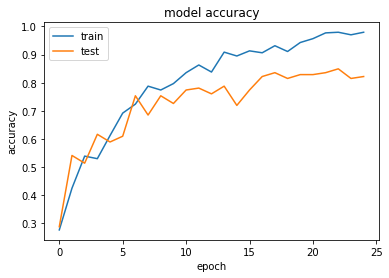

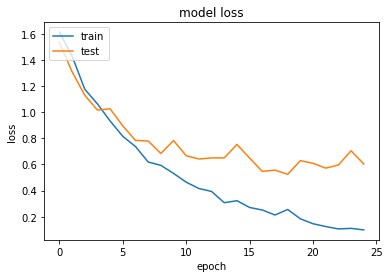

In [46]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.71      0.86      0.77        28
      GMB_02       0.89      0.74      0.81        34
      GMB_03       0.88      0.85      0.86        26
      GMB_04       0.96      0.75      0.84        32
      GMB_05       0.74      0.96      0.83        26

    accuracy                           0.82       146
   macro avg       0.83      0.83      0.82       146
weighted avg       0.84      0.82      0.82       146



In [48]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [50]:
import cv2
import matplotlib.pyplot as plt
image1='dataset/GMB_01/IMG_20200814_132017_HDR.jpg'

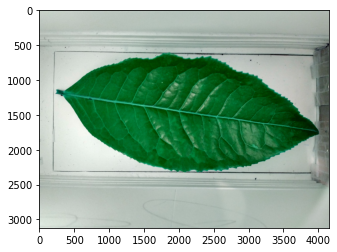

In [51]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [52]:
image_testing = Image.open('dataset/GMB_01/IMG_20200814_132017_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [53]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [54]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.8936146e-01 1.7442401e-04 7.7458262e-06 1.0412917e-02 4.3460779e-05]]
['GMB_01']
